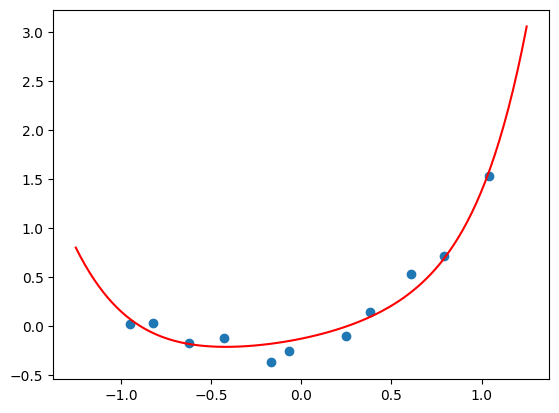

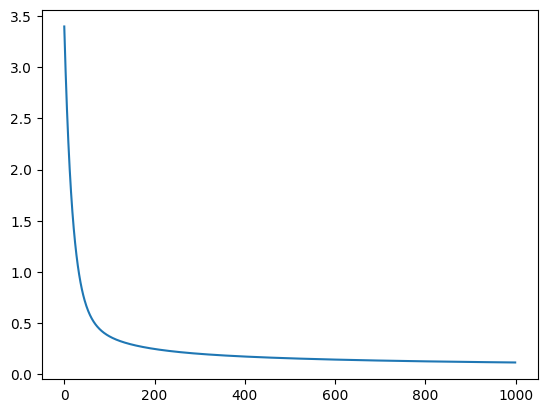

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# L = 0.0
# y_hati = np.dot(x_vec.T, a_vec)
# Li = (yi-y_hati) **2        
# L += Li

def compute_xi(x: np.array, order: int):
    x_vec = np.zeros((order+1, len(x)))
    for n in range(order+1):
        x_vec[n] = x**n
    return x_vec

def get_poly_regression_coeffs(x: np.array, y: np.array, order: int, num_iter: int, lr: float):
    xi = compute_xi(x, order)
    a_vec = np.zeros(order+1, dtype=np.float32)
    L = []
    for i in range(num_iter):
        y_pred = np.dot(a_vec, xi) # xi est de taille (order, len(x))
        L.append(np.sum((y_pred-y) **2))
        grad = 2*np.dot(xi, (y_pred-y))
        a = a_vec - lr*grad
        a_vec = a
    return a_vec, L
    
xy = np.array([[-0.95,-0.82,-0.62,-0.43,-0.17,-0.07,0.25,0.38,0.61,0.79,1.04],
              [0.02, 0.03, -0.17, -0.12, -0.37, -0.25, -0.10, 0.14, 0.53, 0.71, 1.53]])

# Transforme xy to be xy = np.array([x, y])
xy = xy.T
plt.scatter(xy[:,0], xy[:,1])

# Trace the regression line from linespace[-1.25, 1.25, 100]
x = np.linspace(-1.25, 1.25, 100)
order = 7
a_vec, loss = get_poly_regression_coeffs(xy[:,0], xy[:,1], order, 1000, 0.001)
xi_input = compute_xi(x, order)
y_estimate = np.dot(a_vec, xi_input)
plt.plot(x, y_estimate, color='red')

plt.figure()
plt.plot(loss)

    
    